### Steps 

1. Design model input, output size, forward pass
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction and loss
    - backward pass: gradients
    - update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

**Step - 0** Data Preparation 

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) # make it column vector

n_samples, n_features = X.shape 
print(n_samples, n_features)

100 1


**Step - 1** Build Model

In [3]:
input_size = n_features 
output_size = 1
model = nn.Linear(input_size, output_size)

**Step - 2** Loss and Optimizer

In [4]:
learning_rate = 0.01
criterion  = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

**Step - 3** Training Loop



In [5]:
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass 
    loss.backward()

    # update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} ,loss = {loss.item():.4f}')

epoch: 10 ,loss = 4347.4551
epoch: 20 ,loss = 3246.5164
epoch: 30 ,loss = 2449.2358
epoch: 40 ,loss = 1871.2803
epoch: 50 ,loss = 1451.9270
epoch: 60 ,loss = 1147.3911
epoch: 70 ,loss = 926.0616
epoch: 80 ,loss = 765.0874
epoch: 90 ,loss = 647.9318
epoch: 100 ,loss = 562.6150


Plotting

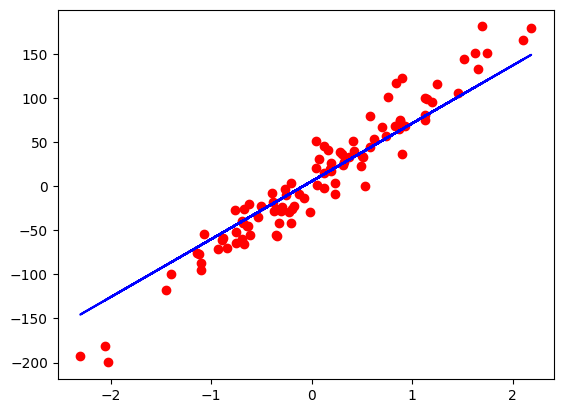

In [7]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
